In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

## Setup

In [38]:
# Create a dict of edges
fname3 = 'celegans_connectome_multiplex.edges'
print(f'reading the network file : {fname3}\n')
f = open('./' + fname3, 'r')

edges1 = {}
edges2 = {}
edges3 = {}
counter1 = 0
counter2 = 0
counter3 = 0

for line in f:
    layer, node1, node2, w = map(int, line.strip().split(' '))
    if layer == 1:
        edges1[counter1] = node1, node2
        counter1 += 1
        #print(1)
    if layer == 2:
        edges2[counter2] = node1, node2
        counter2 += 1
        #print(2)
    if layer == 3:
        edges3[counter3] = node1, node2
        counter3 += 1
        #print(3)

# create new edges from the dictionary
new_edges1 = []
for idx, e in edges1.items():
    new_edges1.append(e)
new_edges2 = []
for idx, e in edges2.items():
    new_edges2.append(e)
new_edges3 = []
for idx, e in edges3.items():
    new_edges3.append(e)
G1 = nx.MultiGraph(new_edges1)
G2 = nx.MultiGraph(new_edges2)
G3 = nx.MultiGraph(new_edges3)
print(G1)
print(G2)
print(G3)

reading the network file : celegans_connectome_multiplex.edges

MultiGraph with 253 nodes and 1031 edges
MultiGraph with 260 nodes and 1639 edges
MultiGraph with 278 nodes and 3193 edges


In [39]:
def count_motifs(g, motif_s):
    # Find motifs of size motif_s in the graph layer in g
    motif_count = []
    for layer_g in g:
        c =  layer_g.motifs_randesu_no(size=motif_s)
        motif_count.append(c)
    return(motif_count)

In [40]:
# Define the edges for each layer
G1_edges = new_edges1
G2_edges = new_edges2
G3_edges = new_edges3

# Combine all edges into a single list
all_edges = G1_edges + G2_edges + G3_edges

# Create Graph object for the combined graph
combined_graph = ig.Graph.TupleList(all_edges, directed=False)

# Create Graph objects for each layer
layer1_graph = ig.Graph.TupleList(G1_edges, directed=False)
layer2_graph = ig.Graph.TupleList(G2_edges, directed=False)
layer3_graph = ig.Graph.TupleList(G3_edges, directed=False)
layer_graph = [layer1_graph, layer2_graph, layer3_graph, combined_graph]

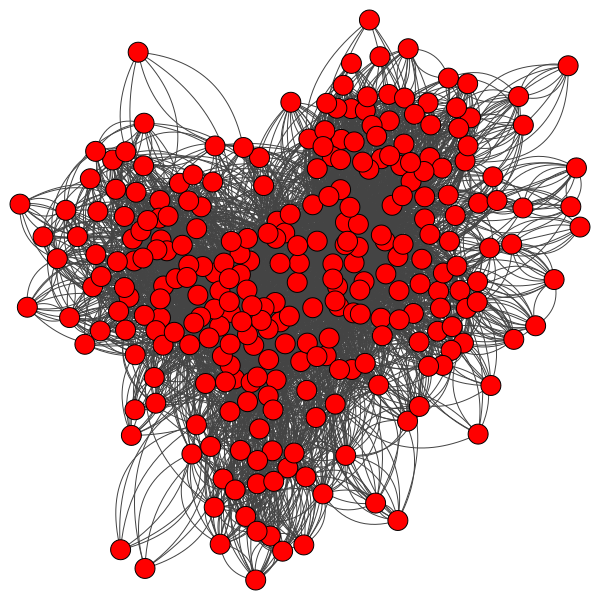

In [112]:
ig.plot(combined_graph)

In [41]:
# Find motifs of size three in each layer
motif_count_arr = count_motifs(layer_graph, 3)

for i in range(len(motif_count_arr)):
    if i < 3:
        print("Number of size 3 motifs in Layer", i+1, ":", motif_count_arr[i])
    else:
        print("Number of size 3 motifs in all layers:", motif_count_arr[i])

Number of size 3 motifs in Layer 1 : 3632
Number of size 3 motifs in Layer 2 : 9046
Number of size 3 motifs in Layer 3 : 28816
Number of size 3 motifs in all layers: 48874


In [42]:
# Find motifs of size four in each layer
motif_count_arr = count_motifs(layer_graph, 4)

for i in range(len(motif_count_arr)):
    if i < 3:
        print("Number of size 4 motifs in Layer", i+1, ":", motif_count_arr[i])
    else:
        print("Number of size 4 motifs in all layers:", motif_count_arr[i])

Number of size 4 motifs in Layer 1 : 37282
Number of size 4 motifs in Layer 2 : 124525
Number of size 4 motifs in Layer 3 : 642427
Number of size 4 motifs in all layers: 1337458


In [43]:
# Find motifs of size five in each layer
motif_count_arr = count_motifs(layer_graph, 5)

for i in range(len(motif_count_arr)):
    if i < 3:
        print("Number of size 5 motifs in Layer", i+1, ":", motif_count_arr[i])
    else:
        print("Number of size 5 motifs in all layers:", motif_count_arr[i])

Number of size 5 motifs in Layer 1 : 394560
Number of size 5 motifs in Layer 2 : 1858416
Number of size 5 motifs in Layer 3 : 15182446
Number of size 5 motifs in all layers: 38090978


In [44]:
# Find motifs of size six in each layer
motif_count_arr = count_motifs(layer_graph, 6)

for i in range(len(motif_count_arr)):
    if i < 3:
        print("Number of size 6 motifs in Layer", i+1, ":", motif_count_arr[i])
    else:
        print("Number of size 6 motifs in all layers:", motif_count_arr[i])

Number of size 6 motifs in Layer 1 : 4086382
Number of size 6 motifs in Layer 2 : 27857106
Number of size 6 motifs in Layer 3 : 353400386
Number of size 6 motifs in all layers: 1057086017


## Triangle Motifs

In [45]:
def triangle_m(G):
    triangles = 0
    for u, v in G.edges():
        for k in G.neighbors(u):
            if k != v and G.has_edge(v, k):
                triangles = triangles + 1
    return triangles // 2

In [46]:
G1_t = triangle_m(G1)
print(G1_t)
G2_t = triangle_m(G2)
print(G2_t)
G3_t = triangle_m(G3)
print(G3_t)
G_new = nx.MultiGraph(all_edges)
Gnew_t = triangle_m(G_new)
print(Gnew_t)
print("Triangle motifs between layers:", Gnew_t-G3_t-G2_t-G1_t)

552
1221
6183
16804
Triangle motifs between layers: 8848
